In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [64]:
#VALAJOUT LOADING
VALAJOUT = pd.read_csv(f'../Y3 - Sample data/Z4 - VALAJOUT-predictions.csv', index_col=0)
VALAJOUT = VALAJOUT.rename(columns={'pred_lgbm_BOXCOX':'pred_VALAJOUT', 'target':'VALAJOUT'})
VALAJOUT = VALAJOUT.drop(['thickness', 'bend_group'], axis=1)
VALAJOUT.head()

,COART,pred_VALAJOUT,VALAJOUT
0,L1614870,0.734380,1.10
1,L7052470,2.388105,2.26
2,L7069450,4.947808,5.16
3,L7056570,1.469685,1.60
4,L7055980,4.261533,4.54


In [65]:
#VAMAT LOADING
VAMAT = pd.read_csv(f'../Y3 - Sample data/Z4 - VAMAT-predictions.csv', index_col=0)
VAMAT = VAMAT.rename(columns={'pred_lgbm_BOXCOX':'pred_VAMAT', 'target':'VAMAT'})
VAMAT.head()

,COART,pred_VAMAT,VAMAT,thickness,bend_group
0,L3041770,3.850384,3.40,8.0,3-5
1,L6802530,0.156556,0.15,6.0,1-2
2,L2605410,10.765516,11.21,8.0,1-2
3,L7058820,9.043264,6.70,12.0,0
4,L6011841,21.709876,21.00,6.0,1-2


In [66]:
#Data assembly
dataset = pd.merge(VAMAT, VALAJOUT, on='COART', how='inner')
dataset.shape

(410, 7)

In [67]:
dataset.head()

,COART,pred_VAMAT,VAMAT,thickness,bend_group,pred_VALAJOUT,VALAJOUT
0,L3041770,3.850384,3.40,8.0,3-5,5.804148,6.38
1,L1622400,7.450761,6.71,4.0,3-5,4.011860,4.14
2,L3118760,2.238934,2.25,10.0,0,1.547856,1.20
3,L3072130,7.306294,9.00,15.0,0,3.751288,3.68
4,L8043730,0.620152,0.60,4.0,1-2,1.727982,1.91


In [68]:
dataset['VALTOT'] = dataset['VALAJOUT'] + dataset['VAMAT']
dataset['pred_VALTOT'] = dataset['pred_VALAJOUT'] + dataset['pred_VAMAT']
dataset['delta_VALTOT'] = dataset['VALTOT'] - dataset['pred_VALTOT']
dataset.head()

,COART,pred_VAMAT,VAMAT,thickness,bend_group,pred_VALAJOUT,VALAJOUT,VALTOT,pred_VALTOT,delta_VALTOT
0,L3041770,3.850384,3.40,8.0,3-5,5.804148,6.38,9.78,9.654532,0.125468
1,L1622400,7.450761,6.71,4.0,3-5,4.011860,4.14,10.85,11.462621,-0.612621
2,L3118760,2.238934,2.25,10.0,0,1.547856,1.20,3.45,3.786790,-0.336790
3,L3072130,7.306294,9.00,15.0,0,3.751288,3.68,12.68,11.057582,1.622418
4,L8043730,0.620152,0.60,4.0,1-2,1.727982,1.91,2.51,2.348134,0.161866


# Metrics

In [69]:
# Metric MSE
from sklearn.metrics import mean_squared_error

In [70]:
# Metric MAPE Mean absolute percentage error
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

from sklearn.metrics import make_scorer
mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)
mape_scorer

make_scorer(mean_absolute_percentage_error, greater_is_better=False)

# Results

In [71]:
mse = mean_squared_error(dataset['VALTOT'], dataset['pred_VALTOT'])
mape = mean_absolute_percentage_error(dataset['VALTOT'], dataset['pred_VALTOT'])
print('mse', mse)
print('mape', mape)

mse 3.354867888957034
mape 12.890400424549576


In [72]:
dataset[['VALTOT', 'pred_VALTOT']].describe()

,VALTOT,pred_VALTOT
count,410.000000,410.000000
mean,7.632000,7.552018
std,10.438835,10.010191
min,0.600000,0.616914
25%,2.575000,2.558706
50%,4.585000,4.546921
75%,9.100000,9.155402
max,109.030000,95.293902


In [73]:
dataset['MSE'] = (dataset['VALTOT']-dataset['pred_VALTOT'])**2
dataset['MAPE'] = dataset.apply(lambda x: mean_absolute_percentage_error(x['VALTOT'], x['pred_VALTOT']), axis=1)
dataset.head()

,COART,pred_VAMAT,VAMAT,thickness,bend_group,pred_VALAJOUT,VALAJOUT,VALTOT,pred_VALTOT,delta_VALTOT,MSE,MAPE
0,L3041770,3.850384,3.40,8.0,3-5,5.804148,6.38,9.78,9.654532,0.125468,0.015742,1.282903
1,L1622400,7.450761,6.71,4.0,3-5,4.011860,4.14,10.85,11.462621,-0.612621,0.375305,5.646278
2,L3118760,2.238934,2.25,10.0,0,1.547856,1.20,3.45,3.786790,-0.336790,0.113427,9.762015
3,L3072130,7.306294,9.00,15.0,0,3.751288,3.68,12.68,11.057582,1.622418,2.632239,12.795091
4,L8043730,0.620152,0.60,4.0,1-2,1.727982,1.91,2.51,2.348134,0.161866,0.026201,6.448834


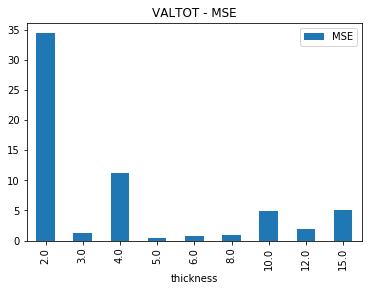

,MSE,COART
,mean,count
thickness,,
2.0,34.444600,6
3.0,1.318849,43
4.0,11.173812,49
5.0,0.437919,52
6.0,0.697641,88
8.0,0.958431,67
10.0,4.958925,57
12.0,2.000878,36


In [74]:
# Is the error sourced by thickness ?
df = dataset[['MSE', 'thickness']].groupby('thickness').mean()
df.plot.bar()
plt.title(f'VALTOT - MSE')
plt.show()
dataset.groupby('thickness').agg({'MSE':['mean'],
                                         'COART':['count']})

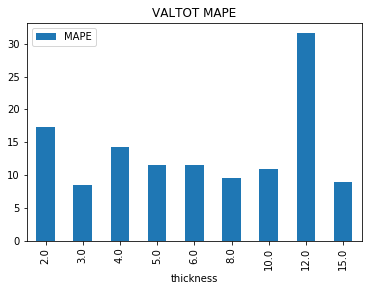

MAPE             COART
                mean         max count
thickness                             
2.0        17.366261   53.591661     6
3.0         8.540735   32.942302    43
4.0        14.219189   39.763649    49
5.0        11.458066   56.713513    52
6.0        11.523802   67.944010    88
8.0         9.519884   27.744985    67
10.0       10.974533   76.922393    57
12.0       31.576557  284.102546    36
15.0        8.902006   25.027658    12

In [75]:
# Is the error sourced by thickness ?
df = dataset[['MAPE', 'thickness']].groupby('thickness').mean()
df.plot.bar()
plt.title(f'VALTOT MAPE')
plt.show()
dataset.groupby('thickness').agg({'MAPE':['mean', 'max'],
                                         'COART':['count']})

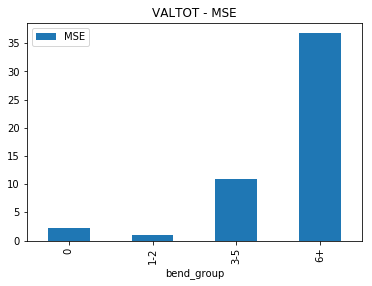

MSE                   MAPE             COART
                 mean         max       mean         max count
bend_group                                                    
0            2.291152  153.757268  14.490447   82.886345   167
1-2          1.061722   54.395610  12.306848  284.102546   182
3-5         10.998962  488.272424   9.493130   39.763649    56
6+          36.739636  169.592633  18.739575   53.591661     5

In [76]:
# Is the error sourced by number of bends ?

df = dataset[['MSE', 'bend_group']].groupby('bend_group').mean()
df.plot.bar()
plt.title(f'VALTOT - MSE')
plt.show()
dataset.groupby('bend_group').agg({'MSE':['mean', 'max'],
                                         'MAPE':['mean', 'max'],
                                         'COART':['count']})

In [77]:
dataset.groupby('thickness')['COART'].count()

thickness
2.0      6
3.0     43
4.0     49
5.0     52
6.0     88
8.0     67
10.0    57
12.0    36
15.0    12
Name: COART, dtype: int64

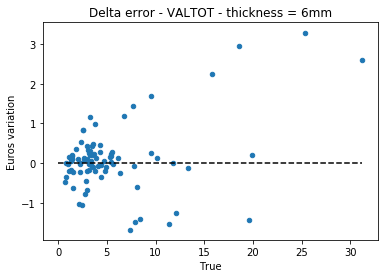

,delta_VALTOT
count,88.000000
mean,0.107848
std,0.833004
min,-1.666068
25%,-0.200548
50%,0.066195
75%,0.257061
max,3.283250


In [79]:

thickness = 6

df = dataset[dataset['thickness']==thickness]

df.plot.scatter('VALTOT', 'delta_VALTOT')
plt.plot([0, df['VALTOT'].max()], [0, 0], color='k', linestyle='--')
plt.title('Delta error - {} - thickness = {}mm'.format('VALTOT', thickness))
plt.xlabel('True')
plt.ylabel('Euros variation')
plt.show()
df[['delta_VALTOT']].describe()

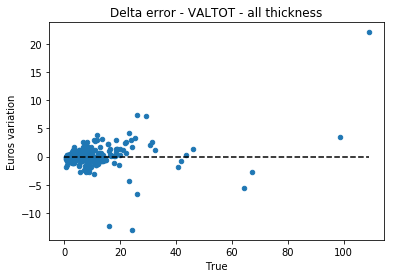

,delta_VALTOT
count,410.000000
mean,0.079982
std,1.832118
min,-13.022774
25%,-0.327754
50%,0.041562
75%,0.319560
max,22.096887


In [80]:
thickness = 6

df = dataset#[dataset['thickness']==thickness]

df.plot.scatter('VALTOT', 'delta_VALTOT')
plt.plot([0, df['VALTOT'].max()], [0, 0], color='k', linestyle='--')
plt.title('Delta error - {} - all thickness'.format('VALTOT'))
plt.xlabel('True')
plt.ylabel('Euros variation')
plt.show()
df[['delta_VALTOT']].describe()

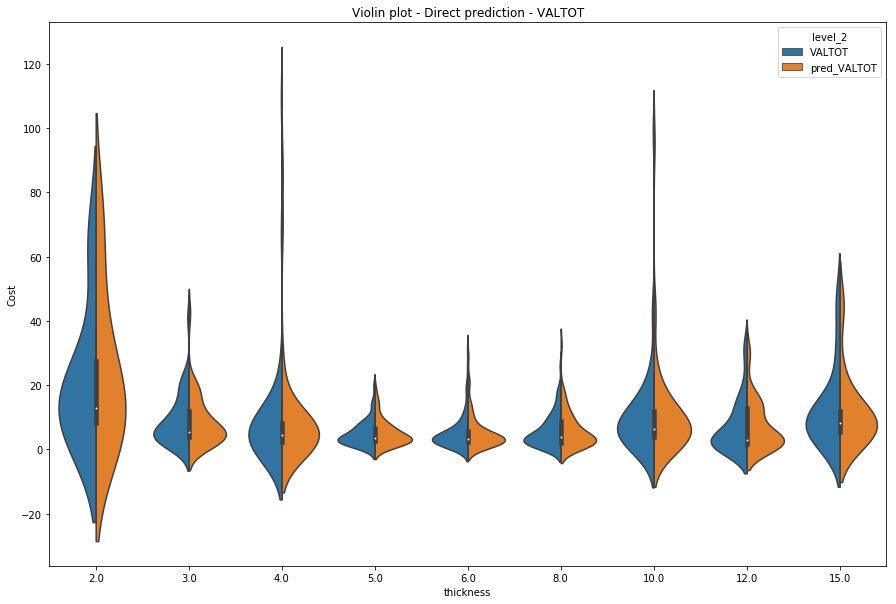

In [81]:
#Violin plot
df=dataset[['VALTOT', 'pred_VALTOT', 'COART', 'thickness']]
#df=df[df['thickness']!=15]
df.set_index(['COART', 'thickness'], inplace=True)
df = df.stack().reset_index()
fig, ax = plt.subplots(figsize=(15,10))
#ax.set_ylim(-100, 100)
sns.violinplot(x="thickness", y=0, data=df, split=True, hue='level_2', ax=ax)
plt.title(f'Violin plot - Direct prediction - VALTOT')
plt.ylabel('Cost')
plt.show()

In [86]:
#General performance
df = dataset[['MSE','MAPE', 'thickness', 'bend_group', 'COART']].groupby(['thickness', 'bend_group'])

perf = df.agg({'MSE': ['mean', 'max'],
        'MAPE': ['mean', 'max'],
        'COART':['count'] })
perf.loc[6]

MSE                  MAPE            COART
                mean        max       mean        max count
bend_group                                                 
0           0.171160   1.952262  11.749008  67.944010    33
1-2         0.677753  10.779727  11.384941  47.549600    46
3-5         2.729728   8.634752  11.407780  23.342528     9